##Assignment 2: <font color='3C6E71'></font>


####Total Points: 5 points)


----
**Objective:**

In this assignment, you will parse a website with a domain registered in Kazakhstan (".kz"), extract relevant data, and conduct detailed data preprocessing and visualization using Python libraries: Pandas, NumPy, and Seaborn.

----

## **Instructions:**

### **1. Website Selection:**

- Choose a website with a ".kz" domain that contains structured data you can scrape (e.g., a market website, real estate listings, job listings, or product prices).
- Ensure that the website allows scraping and has relevant data fields (such as prices, ratings, categories, etc.).

### **2. Web Scraping:**

- Use Python libraries such as `BeautifulSoup` and `requests` (or `Selenium` if necessary) to scrape the chosen ".kz" website.
- Parse the HTML and extract multiple variables (such as product names, prices, categories, ratings, etc.).

### **3. Data Cleaning and Preparation:**

- Perform thorough data cleaning, including handling missing values, outliers, and data type conversions.
- Ensure that the data is standardized and formatted properly.
- Provide a summary of the cleaning process and the rationale behind each step.

### **4. Exploratory Data Analysis (EDA):**

- Use Pandas and NumPy to perform a detailed exploratory data analysis (EDA).
- Calculate descriptive statistics and identify key relationships and trends within the scraped data.

### **5. Data Visualization:**

- Create at least five insightful visualizations using Seaborn that effectively communicate the key findings from your analysis.
- Use a variety of plot types such as scatter plots, histograms, box plots, and heatmaps.
- The visualizations should be logically structured and provide meaningful insights.

### **6. Comment Your Code:**

- Make sure to comment on your code to explain each step clearly.

---


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Lists to store data
almaty_apartments = []
astana_apartments = []

In [5]:
# Parsing function for given city and pages
def parse_city(city, pages, listings):
    for page in range(1, pages + 1):
        url = f"https://krisha.kz/prodazha/kvartiry/{city}/?page={page}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        
        for listing in soup.find_all('div', class_='a-card__inc'):
            title = listing.find('a', class_='a-card__title').text.strip() if listing.find('a', class_='a-card__title') else np.nan
            price = listing.find('div', class_='a-card__price').text.strip() if listing.find('div', class_='a-card__price') else np.nan
            location = listing.find('div', class_='a-card__subtitle').text.strip() if listing.find('div', class_='a-card__subtitle') else np.nan

            description = listing.find('div', class_='a-card__description')
            if description:
                description_parts = description.text.strip().split(',')
                rooms = description_parts[0].strip() if len(description_parts) > 0 else np.nan
                size = description_parts[1].strip() if len(description_parts) > 1 else np.nan
                floor_info = description_parts[2].strip() if len(description_parts) > 2 else np.nan
            else:
                rooms, size, floor_info = np.nan, np.nan, np.nan
            
            listings.append([title, price, location, rooms, size, floor_info])


In [7]:
# Parse data for Almaty and Astana
parse_city('almaty', 20, almaty_apartments)
parse_city('astana', 20, astana_apartments)

In [9]:
# Create DataFrames for each city
df_almaty = pd.DataFrame(almaty_apartments, columns=['Title', 'Price', 'Location', 'Rooms', 'Size (sqm)', 'Floor Info'])
df_astana = pd.DataFrame(astana_apartments, columns=['Title', 'Price', 'Location', 'Rooms', 'Size (sqm)', 'Floor Info'])

In [11]:
# Cleaning datas and handling missing values
df_almaty['Rooms'] = df_almaty['Title'].str.extract(r'(\d+)-комнатная')
df_almaty['Size (sqm)'] = df_almaty['Title'].str.extract(r'(\d+\.?\d*)\s*м²')
df_almaty['Floor Info'] = df_almaty['Title'].str.extract(r'(\d+\s*/\s*\d+)')
df_almaty['Price'] = df_almaty['Price'].replace(r'\D+', '', regex=True)
df_almaty['Price'] = pd.to_numeric(df_almaty['Price'], errors='coerce')
df_almaty = df_almaty.dropna(subset=['Price'])
df_almaty

,Title,Price,Location,Rooms,Size (sqm),Floor Info
0,"3-комнатная квартира, 70.44 м², 3/12 этаж",43000000,"Алатауский р-н, Бауыржана Момышулы 3 — Монке би",3,70.44,3/12
1,"3-комнатная квартира, 68 м², 6/10 этаж",53000000,"Наурызбайский р-н, Кенесары хана 54",3,68,6/10
2,"2-комнатная квартира, 60 м², 4/4 этаж",49000000,"Наурызбайский р-н, мкр Каргалы, Акселеу Сейдим...",2,60,4/4
3,"2-комнатная квартира, 67 м², 4/9 этаж",34000000,"Алатауский р-н, мкр Нуркент (Алгабас-1) 83",2,67,4/9
4,"1-комнатная квартира, 29 м², 5/5 этаж",17500000,"Алатауский р-н, мкр Саялы 33 — ул Аркалык 33",1,29,5/5
...,...,...,...,...,...,...
398,"1-комнатная квартира, 45 м², 9/21 этаж",39900000,"Алмалинский р-н, Варламова",1,45,9/21
399,"3-комнатная квартира, 83.3 м², 10/16 этаж",61000000,"Бостандыкский р-н, Бальзака 8",3,83.3,10/16
400,"1-комнатная квартира, 28.1 м²",12096000,"Алатауский р-н, ул. Момышулы, севернее ул. Мон...",1,28.1,NaN
401,"3-комнатная квартира, 81 м², 2/5 этаж",58500000,"Медеуский р-н, Назарбаева — Макатаева",3,81,2/5


In [15]:
# Cleaning datas and handling 
df_astana['Rooms'] = df_astana['Title'].str.extract(r'(\d+)-комнатная')
df_astana['Size (sqm)'] = df_astana['Title'].str.extract(r'(\d+\.?\d*)\s*м²')
df_astana['Floor Info'] = df_astana['Title'].str.extract(r'(\d+\s*/\s*\d+)')
df_astana['Price'] = df_astana['Price'].replace(r'\D+', '', regex=True)
df_astana['Price'] = pd.to_numeric(df_astana['Price'], errors='coerce')
df_astana = df_astana.dropna(subset=['Price'])
df_astana

,Title,Price,Location,Rooms,Size (sqm),Floor Info
0,"1-комнатная квартира, 39.4 м², 1/12 этаж",20500000,"Нура р-н, Толе би — Казыбек Би",1,39.4,1/12
1,"3-комнатная квартира, 60 м², 5/5 этаж",30000000,"р-н Байконур, Абая 51",3,60,5/5
2,"1-комнатная квартира, 41.1 м², 2/6 этаж",30000000,"Нура р-н, Улы Дала — Сауран",1,41.1,2/6
3,"4-комнатная квартира, 99.09 м², 5/21 этаж",45500000,"Есильский р-н, Туркестан 4/1 — Абу-Даби",4,99.09,5/21
4,"3-комнатная квартира, 100 м², 9/9 этаж",72000000,"Есильский р-н, Жошы хан — Керей Жанибека - Бок...",3,100,9/9
...,...,...,...,...,...,...
398,"2-комнатная квартира, 80.45 м²",64520900,"Есильский р-н, Бухар жырау 26",2,80.45,NaN
399,"3-комнатная квартира, 84.62 м²",40025260,"Нура р-н, Туран 55/12",3,84.62,NaN
400,"3-комнатная квартира, 110 м², 2/9 этаж",42000000,"Сарыарка р-н, Сейфуллина 9",3,110,2/9
401,"2-комнатная квартира, 47 м², 16/17 этаж",27300000,"Есильский р-н, Толе би 16",2,47,16/17


In [17]:
# Create a column called District for Almaty
df_almaty['District'] = df_almaty['Location'].str.split(',').str[0]
df_almaty['District'] = df_almaty['District'].where(df_almaty['District'].str.endswith('р-н'), None)
df_almaty['District']

0         Алатауский р-н
1      Наурызбайский р-н
2      Наурызбайский р-н
3         Алатауский р-н
4         Алатауский р-н
             ...        
398      Алмалинский р-н
399    Бостандыкский р-н
400       Алатауский р-н
401        Медеуский р-н
402      Турксибский р-н
Name: District, Length: 403, dtype: object

In [19]:
# Create a column called District for Astana
df_astana['District'] = df_astana['Location'].str.split(',').str[0]
df_astana['District'] = df_astana['District'].where(df_astana['District'].str.endswith('р-н'), None)
df_astana['District'] 

0           Нура р-н
1               None
2           Нура р-н
3      Есильский р-н
4      Есильский р-н
           ...      
398    Есильский р-н
399         Нура р-н
400     Сарыарка р-н
401    Есильский р-н
402    Есильский р-н
Name: District, Length: 403, dtype: object

In [21]:
# Convert 'Price' and 'Size (sqm)' columns to numeric, coercing errors to NaN
df_almaty['Price'] = pd.to_numeric(df_almaty['Price'], errors='coerce')
df_almaty['Size (sqm)'] = pd.to_numeric(df_almaty['Size (sqm)'], errors='coerce')

df_astana['Price'] = pd.to_numeric(df_astana['Price'], errors='coerce')
df_astana['Size (sqm)'] = pd.to_numeric(df_astana['Size (sqm)'], errors='coerce')

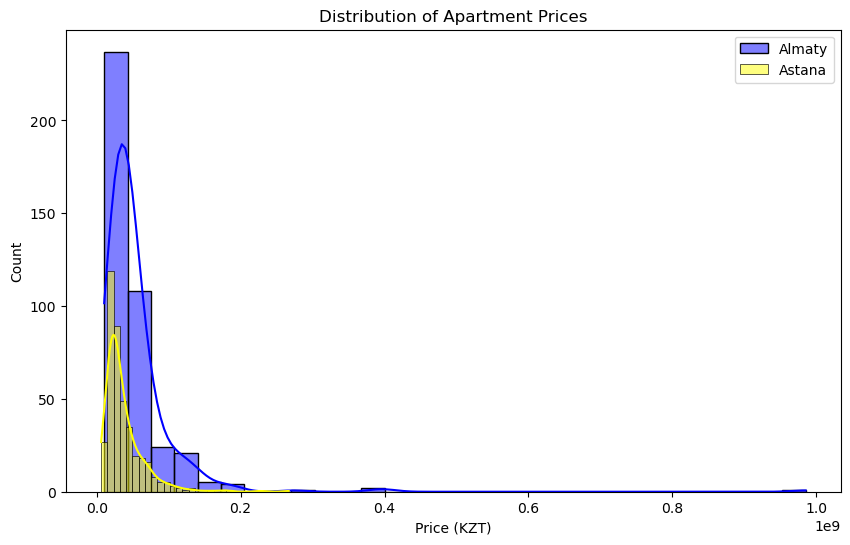

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df_almaty['Price'], bins=30, kde=True, color='blue', label='Almaty')
sns.histplot(df_astana['Price'], bins=30, kde=True, color='yellow', label='Astana')
plt.title('Distribution of Apartment Prices')
plt.xlabel('Price (KZT)')
plt.ylabel('Count')
plt.legend()
plt.show()

In [25]:
# 8. Top 5 Most Expensive Listings
top_expensive_almaty = df_almaty.nlargest(5, 'Price')[['Title', 'Price', 'Location']]
print("Top 5 Most Expensive Apartments - Almaty")
top_expensive_almaty

Top 5 Most Expensive Apartments - Almaty


,Title,Price,Location
281,"6-комнатная квартира, 492.68 м²",985360000,"Бостандыкский р-н, мкр-н Мирас, ул. Садыкова"
244,"5-комнатная квартира, 400 м², 1/7 этаж",400000000,"Медеуский р-н, Митина — Достык - Митина"
144,"5-комнатная квартира, 230.94 м²",392598000,"Медеуский р-н, Городская 3"
277,"5-комнатная квартира, 171.15 м²",273500000,"Медеуский р-н, мкр Коктобе, Сагадат Нурмагамбе..."
189,"4-комнатная квартира, 197 м²",191090000,Медеуский р-н


In [27]:
top_expensive_astana = df_astana.nlargest(5, 'Price')[['Title', 'Price', 'Location']]
print("Top 5 Most Expensive Apartments - Astana")
top_expensive_almaty

Top 5 Most Expensive Apartments - Astana


,Title,Price,Location
281,"6-комнатная квартира, 492.68 м²",985360000,"Бостандыкский р-н, мкр-н Мирас, ул. Садыкова"
244,"5-комнатная квартира, 400 м², 1/7 этаж",400000000,"Медеуский р-н, Митина — Достык - Митина"
144,"5-комнатная квартира, 230.94 м²",392598000,"Медеуский р-н, Городская 3"
277,"5-комнатная квартира, 171.15 м²",273500000,"Медеуский р-н, мкр Коктобе, Сагадат Нурмагамбе..."
189,"4-комнатная квартира, 197 м²",191090000,Медеуский р-н


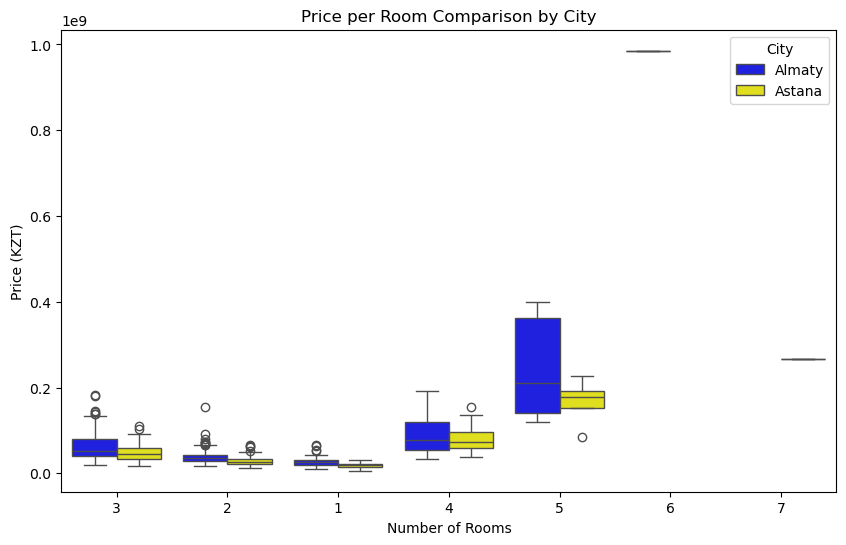

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.concat([df_almaty.assign(City='Almaty'), df_astana.assign(City='Astana')]),
            x='Rooms', y='Price', hue='City', palette=['blue', 'yellow'])
plt.title('Price per Room Comparison by City')
plt.xlabel('Number of Rooms')
plt.ylabel('Price (KZT)')
plt.legend(title='City')
plt.show()

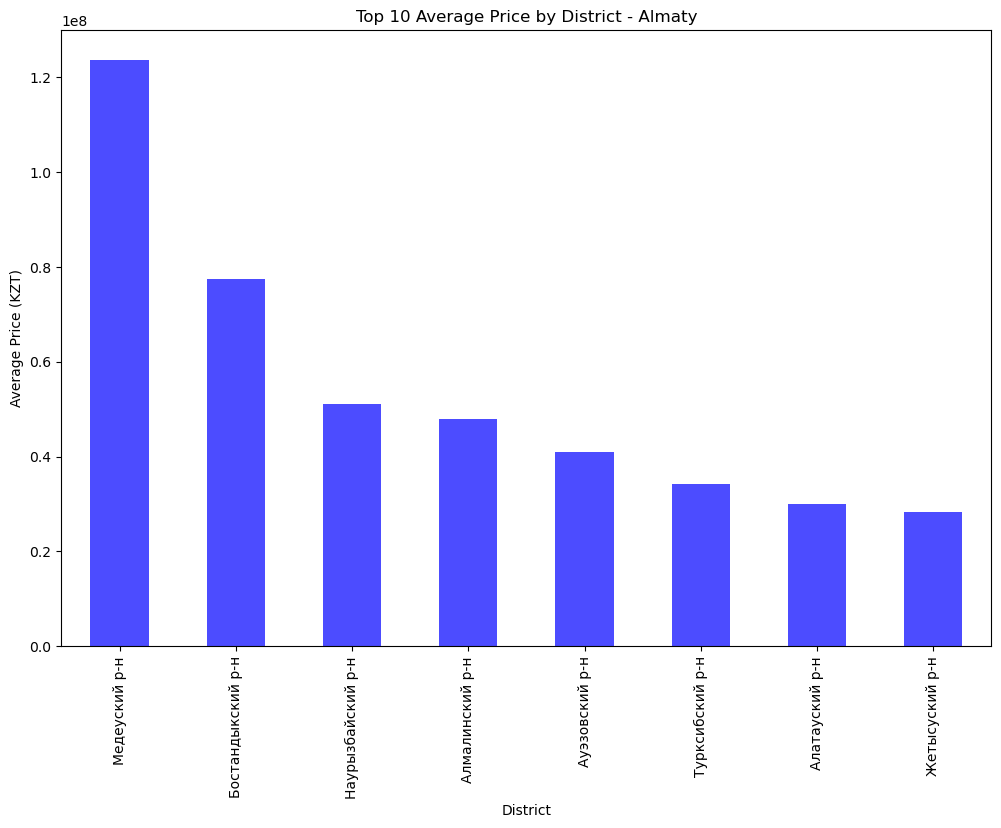

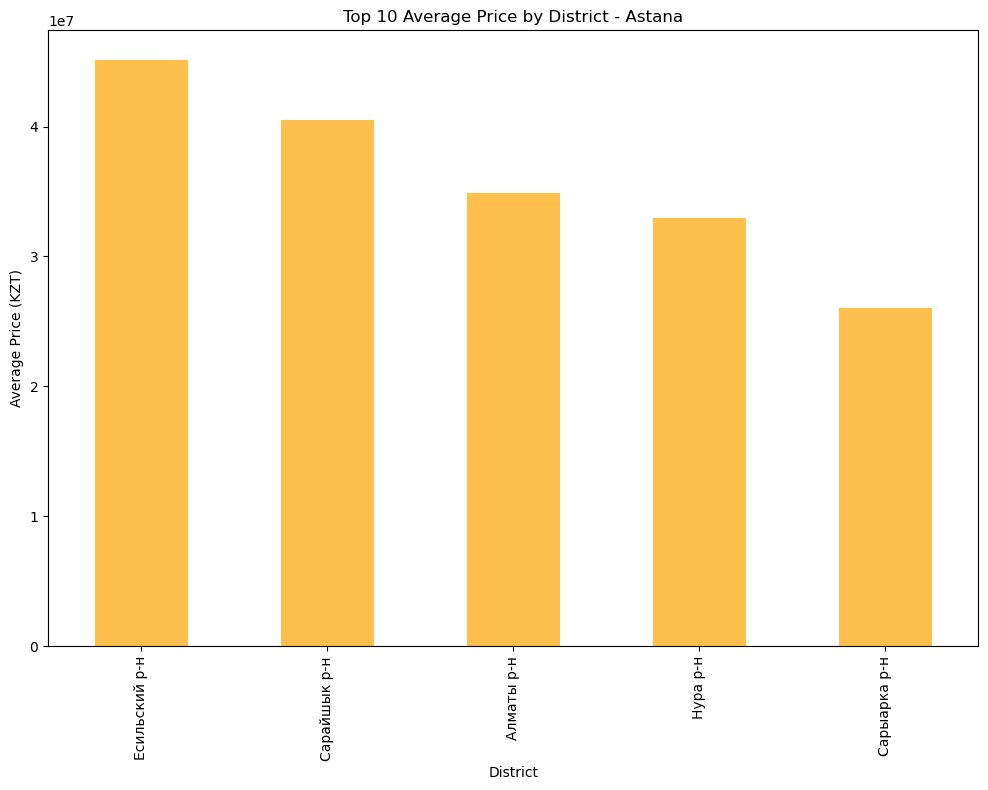

In [31]:
avg_price_by_district_almaty = df_almaty.groupby('District')['Price'].mean().nlargest(10)
avg_price_by_district_astana = df_astana.groupby('District')['Price'].mean().nlargest(10)

plt.figure(figsize=(12, 8))
avg_price_by_district_almaty.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Top 10 Average Price by District - Almaty')
plt.xlabel('District')
plt.ylabel('Average Price (KZT)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 8))
avg_price_by_district_astana.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Top 10 Average Price by District - Astana')
plt.xlabel('District')
plt.ylabel('Average Price (KZT)')
plt.xticks(rotation=90)
plt.show()


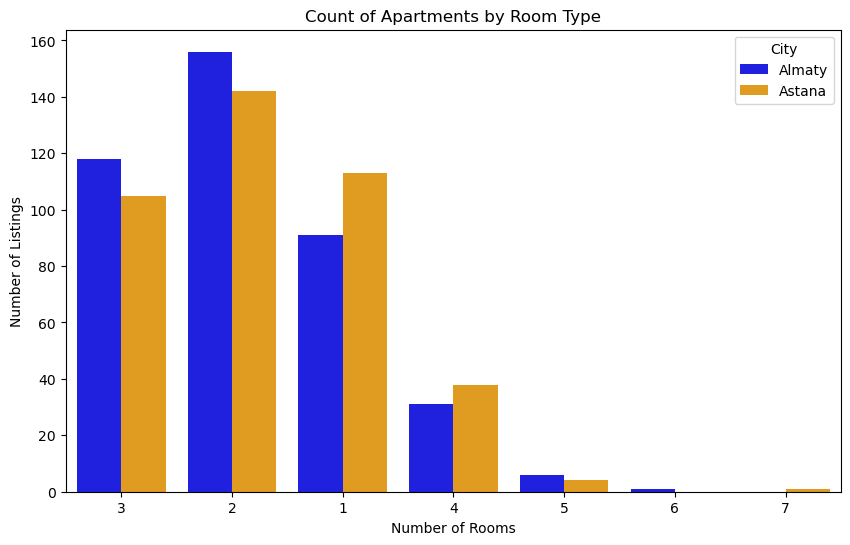

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=pd.concat([df_almaty.assign(City='Almaty'), df_astana.assign(City='Astana')]), 
              x='Rooms', hue='City', palette=['blue', 'orange'])
plt.title('Count of Apartments by Room Type')
plt.xlabel('Number of Rooms')
plt.ylabel('Number of Listings')
plt.legend(title='City')
plt.show()


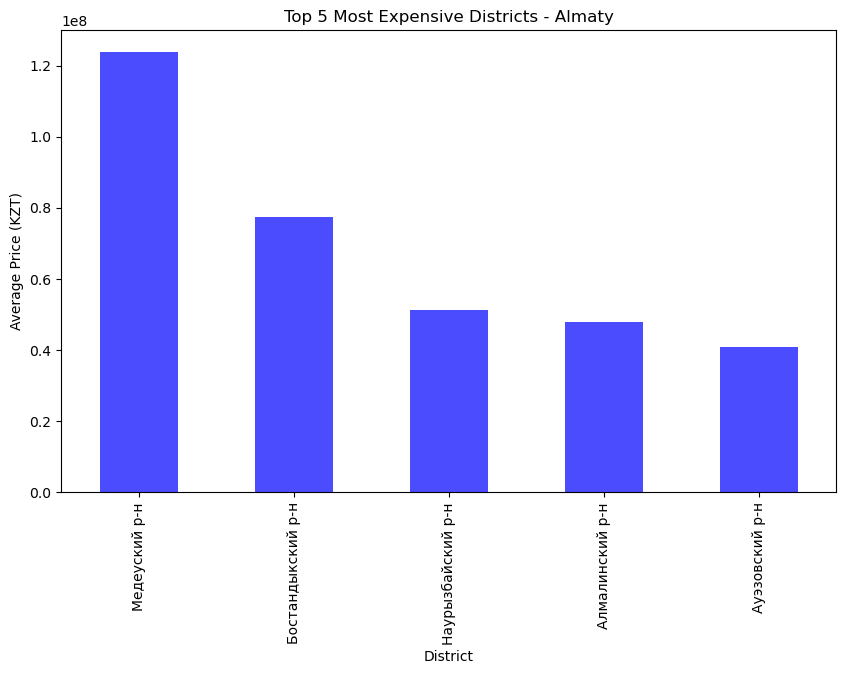

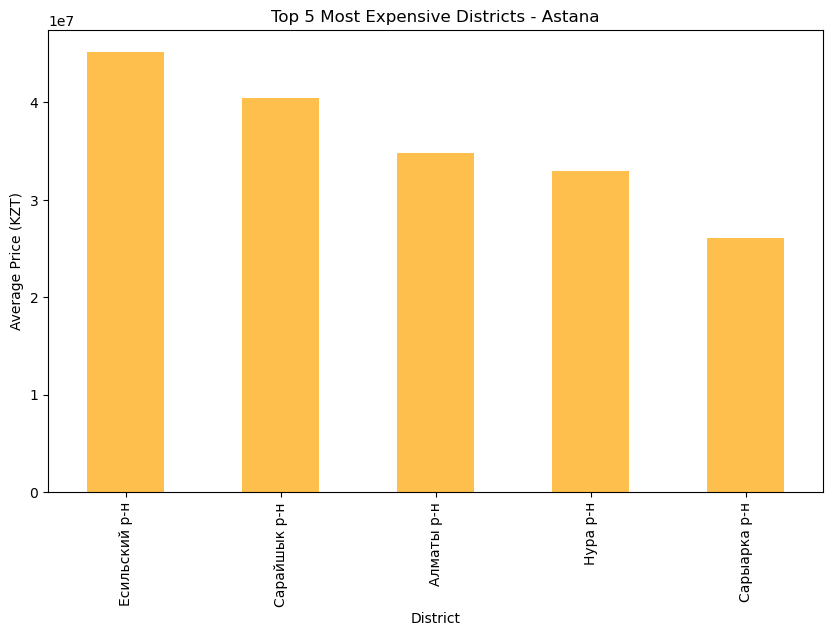

In [35]:
expensive_districts_almaty = df_almaty.groupby('District')['Price'].mean().nlargest(5)
expensive_districts_astana = df_astana.groupby('District')['Price'].mean().nlargest(5)

plt.figure(figsize=(10, 6))
expensive_districts_almaty.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Top 5 Most Expensive Districts - Almaty')
plt.xlabel('District')
plt.ylabel('Average Price (KZT)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
expensive_districts_astana.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Top 5 Most Expensive Districts - Astana')
plt.xlabel('District')
plt.ylabel('Average Price (KZT)')
plt.xticks(rotation=90)
plt.show()


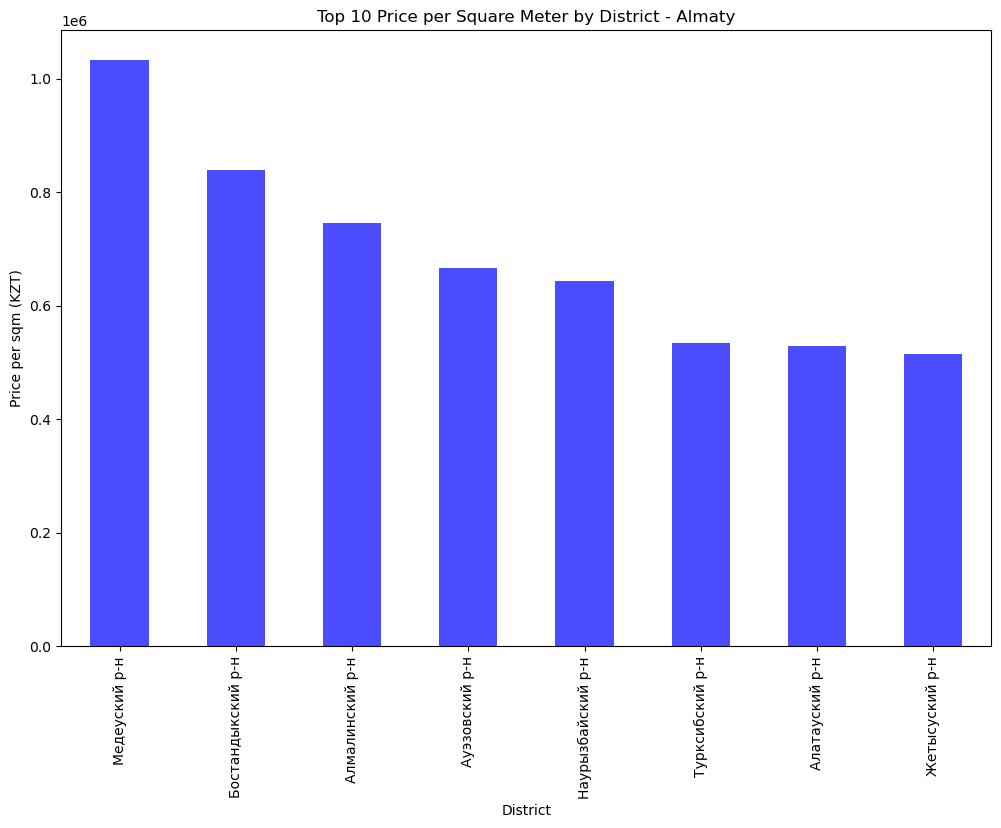

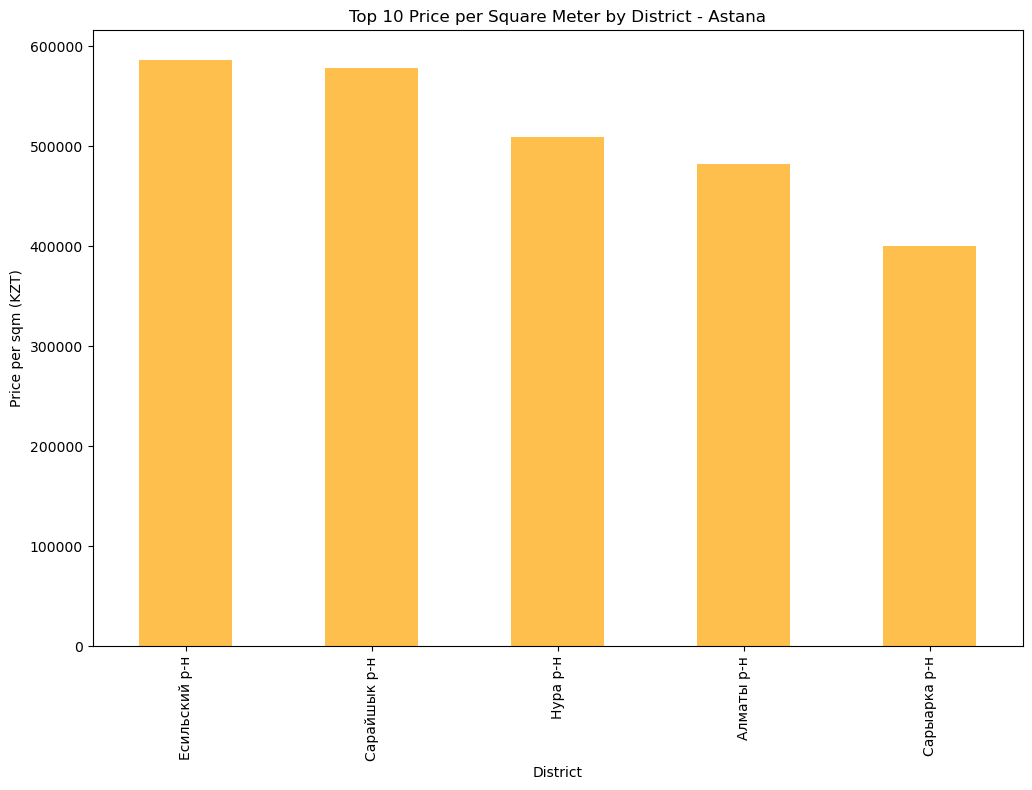

In [37]:
# Now create the 'Price_per_sqm' column
df_almaty['Price_per_sqm'] = df_almaty['Price'] / df_almaty['Size (sqm)']
df_astana['Price_per_sqm'] = df_astana['Price'] / df_astana['Size (sqm)']

# Proceed with the top 10 districts by average price per square meter
price_per_sqm_almaty = df_almaty.groupby('District')['Price_per_sqm'].mean().nlargest(10)
price_per_sqm_astana = df_astana.groupby('District')['Price_per_sqm'].mean().nlargest(10)

# Plotting for Almaty
plt.figure(figsize=(12, 8))
price_per_sqm_almaty.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Top 10 Price per Square Meter by District - Almaty')
plt.xlabel('District')
plt.ylabel('Price per sqm (KZT)')
plt.xticks(rotation=90)
plt.show()

# Plotting for Astana
plt.figure(figsize=(12, 8))
price_per_sqm_astana.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Top 10 Price per Square Meter by District - Astana')
plt.xlabel('District')
plt.ylabel('Price per sqm (KZT)')
plt.xticks(rotation=90)
plt.show()

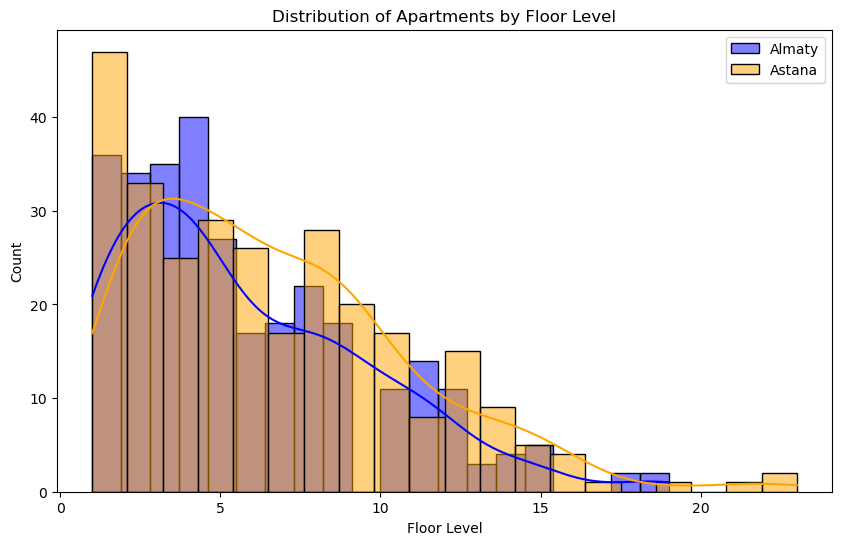

In [39]:
# Ensure that the 'Floor Info' column has valid numeric data
df_almaty['Floor'] = pd.to_numeric(df_almaty['Floor Info'].str.split('/').str[0], errors='coerce')
df_astana['Floor'] = pd.to_numeric(df_astana['Floor Info'].str.split('/').str[0], errors='coerce')

# Plot the distribution of floor levels for Almaty and Astana
plt.figure(figsize=(10, 6))
sns.histplot(df_almaty['Floor'], bins=20, kde=True, color='blue', label='Almaty')
sns.histplot(df_astana['Floor'], bins=20, kde=True, color='orange', label='Astana')
plt.title('Distribution of Apartments by Floor Level')
plt.xlabel('Floor Level')
plt.ylabel('Count')
plt.legend()
plt.show()


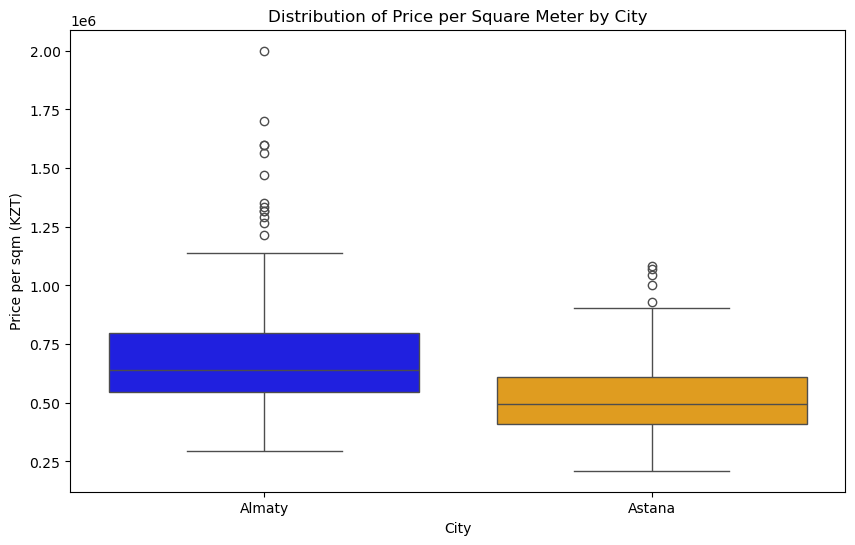

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.concat([df_almaty.assign(City='Almaty'), df_astana.assign(City='Astana')]), 
            x='City', y='Price_per_sqm', hue='City', palette=['blue', 'orange'])
plt.title('Distribution of Price per Square Meter by City')
plt.xlabel('City')
plt.ylabel('Price per sqm (KZT)')
plt.show()


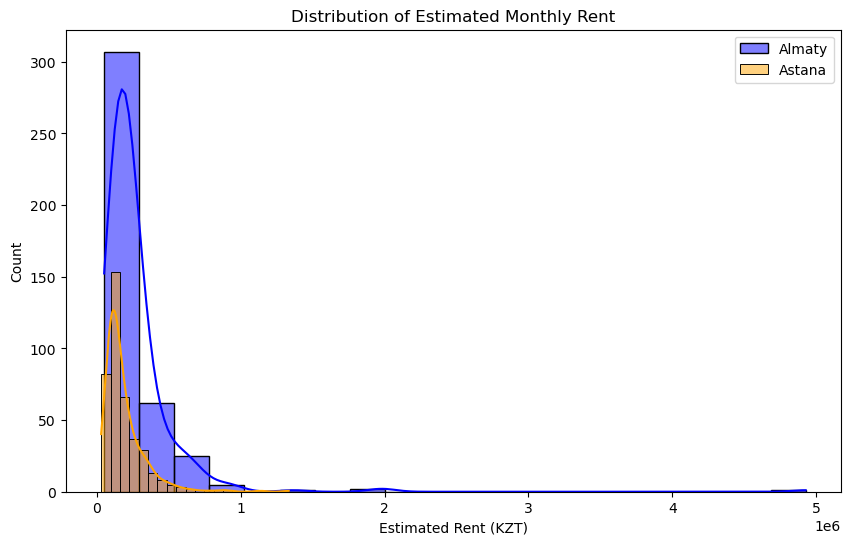

In [43]:
df_almaty['Estimated Rent'] = df_almaty['Price'] * 0.005
df_astana['Estimated Rent'] = df_astana['Price'] * 0.005

plt.figure(figsize=(10, 6))
sns.histplot(df_almaty['Estimated Rent'], bins=20, kde=True, color='blue', label='Almaty')
sns.histplot(df_astana['Estimated Rent'], bins=20, kde=True, color='orange', label='Astana')
plt.title('Distribution of Estimated Monthly Rent')
plt.xlabel('Estimated Rent (KZT)')
plt.ylabel('Count')
plt.legend()
plt.show()